In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip 'drive/MyDrive/fruits-360.zip' -d 'drive/MyDrive/'

Streaming output truncated to the last 5000 lines.
  inflating: drive/MyDrive/fruits-360/Training/Tomato 2/r_290_100.jpg  
  inflating: drive/MyDrive/fruits-360/Training/Tomato 2/r_291_100.jpg  
  inflating: drive/MyDrive/fruits-360/Training/Tomato 2/r_292_100.jpg  
  inflating: drive/MyDrive/fruits-360/Training/Tomato 2/r_293_100.jpg  
  inflating: drive/MyDrive/fruits-360/Training/Tomato 2/r_294_100.jpg  
  inflating: drive/MyDrive/fruits-360/Training/Tomato 2/r_295_100.jpg  
  inflating: drive/MyDrive/fruits-360/Training/Tomato 2/r_296_100.jpg  
  inflating: drive/MyDrive/fruits-360/Training/Tomato 2/r_297_100.jpg  
  inflating: drive/MyDrive/fruits-360/Training/Tomato 2/r_298_100.jpg  
  inflating: drive/MyDrive/fruits-360/Training/Tomato 2/r_299_100.jpg  
  inflating: drive/MyDrive/fruits-360/Training/Tomato 2/r_2_100.jpg  
  inflating: drive/MyDrive/fruits-360/Training/Tomato 2/r_300_100.jpg  
  inflating: drive/MyDrive/fruits-360/Training/Tomato 2/r_301_100.jpg  
  inflating: dr

In [3]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential,Model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

# Check for GPU
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.5.0
Hub version: 0.12.0
GPU available (YESS!!!!)


In [5]:
!pip install split-folders

In [6]:
import splitfolders

In [7]:
input = 'drive/MyDrive/fruits-360/Training'
output = 'drive/MyDrive/fruits_dataset/'
splitfolders.ratio(input,output,seed = 44, ratio = (0.8,0.2))

Copying files: 67692 files [14:31, 77.66 files/s]


In [27]:
img_width, img_height = (224,224)
batch_size = 32
train_data_directory = "drive/MyDrive/fruits_dataset/train/"
val_data_directory = "drive/MyDrive/fruits_dataset/val"
test_data_directory = 'drive/MyDrive/fruits-360/Test'

In [9]:
names = []
images = []
for i in os.listdir(train_data_directory):
    for image_filename in os.listdir(train_data_directory + i):
        names.append(i) # name
        images.append(i + '/' + image_filename) # image

In [10]:
train_pics = pd.DataFrame({'Labels':names,'Images':images})
train_pics

,Labels,Images
0,Apple Braeburn,Apple Braeburn/r_180_100.jpg
1,Apple Braeburn,Apple Braeburn/302_100.jpg
2,Apple Braeburn,Apple Braeburn/r_287_100.jpg
3,Apple Braeburn,Apple Braeburn/r_19_100.jpg
4,Apple Braeburn,Apple Braeburn/218_100.jpg
...,...,...
54106,Watermelon,Watermelon/r_151_100.jpg
54107,Watermelon,Watermelon/r_157_100.jpg
54108,Watermelon,Watermelon/r_20_100.jpg
54109,Watermelon,Watermelon/r_190_100.jpg


In [11]:
print(train_pics.describe())
print(train_pics.head())

            Labels                        Images
count        54111                         54111
unique         131                         54111
top     Grape Blue  Pomelo Sweetie/r2_37_100.jpg
freq           787                             1
           Labels                        Images
0  Apple Braeburn  Apple Braeburn/r_180_100.jpg
1  Apple Braeburn    Apple Braeburn/302_100.jpg
2  Apple Braeburn  Apple Braeburn/r_287_100.jpg
3  Apple Braeburn   Apple Braeburn/r_19_100.jpg
4  Apple Braeburn    Apple Braeburn/218_100.jpg


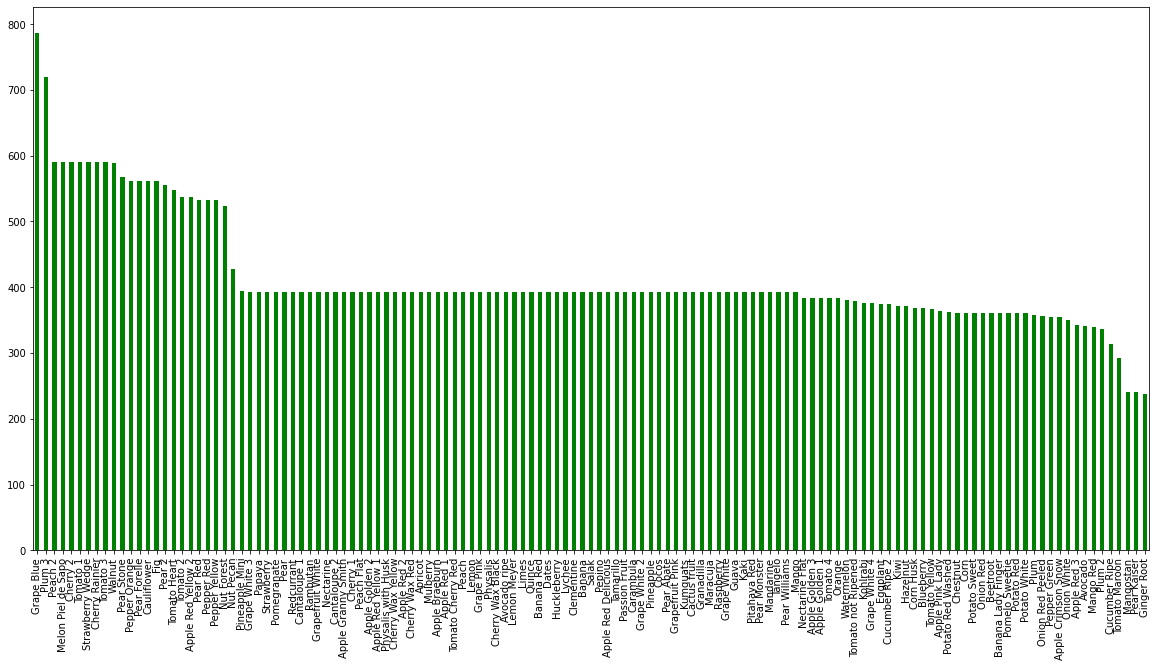

In [14]:
# How many images are there of each catagory?
train_pics["Labels"].value_counts().plot.bar(figsize=(20, 10),color = 'green');

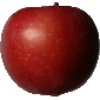

In [15]:
from IPython.display import display, Image
Image("/content/drive/MyDrive/fruits-360/Training/Apple Braeburn/102_100.jpg")

In [16]:
from collections import Counter
newData = Counter(train_pics["Labels"])
most_pics = newData.most_common(15)

print("The 15 most frequently found fruits in the data set and their number")
most_pics

The 15 most frequently found fruits in the data set and their number


[('Grape Blue', 787),
 ('Plum 3', 720),
 ('Cherry 2', 590),
 ('Cherry Rainier', 590),
 ('Melon Piel de Sapo', 590),
 ('Peach 2', 590),
 ('Strawberry Wedge', 590),
 ('Tomato 1', 590),
 ('Tomato 3', 590),
 ('Walnut', 588),
 ('Pear Stone', 568),
 ('Cauliflower', 561),
 ('Fig', 561),
 ('Pear Forelle', 561),
 ('Pepper Orange', 561)]

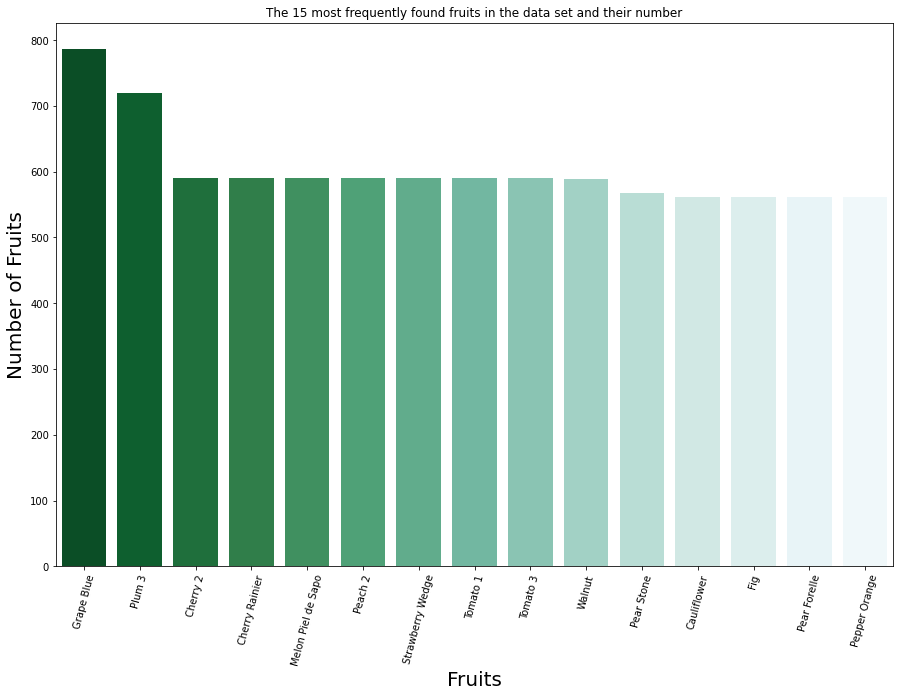

In [49]:
plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y, palette=sns.color_palette("BuGn_r", 15)) 
plt.xlabel('Fruits', size = 20) 
plt.ylabel('Number of Fruits', size = 20 )
plt.xticks(rotation = 75)
plt.title('The 15 most frequently found fruits in the data set and their number') 
plt.show()

In [17]:
x,y = zip(*most_pics)
x,y = list(x),list(y)

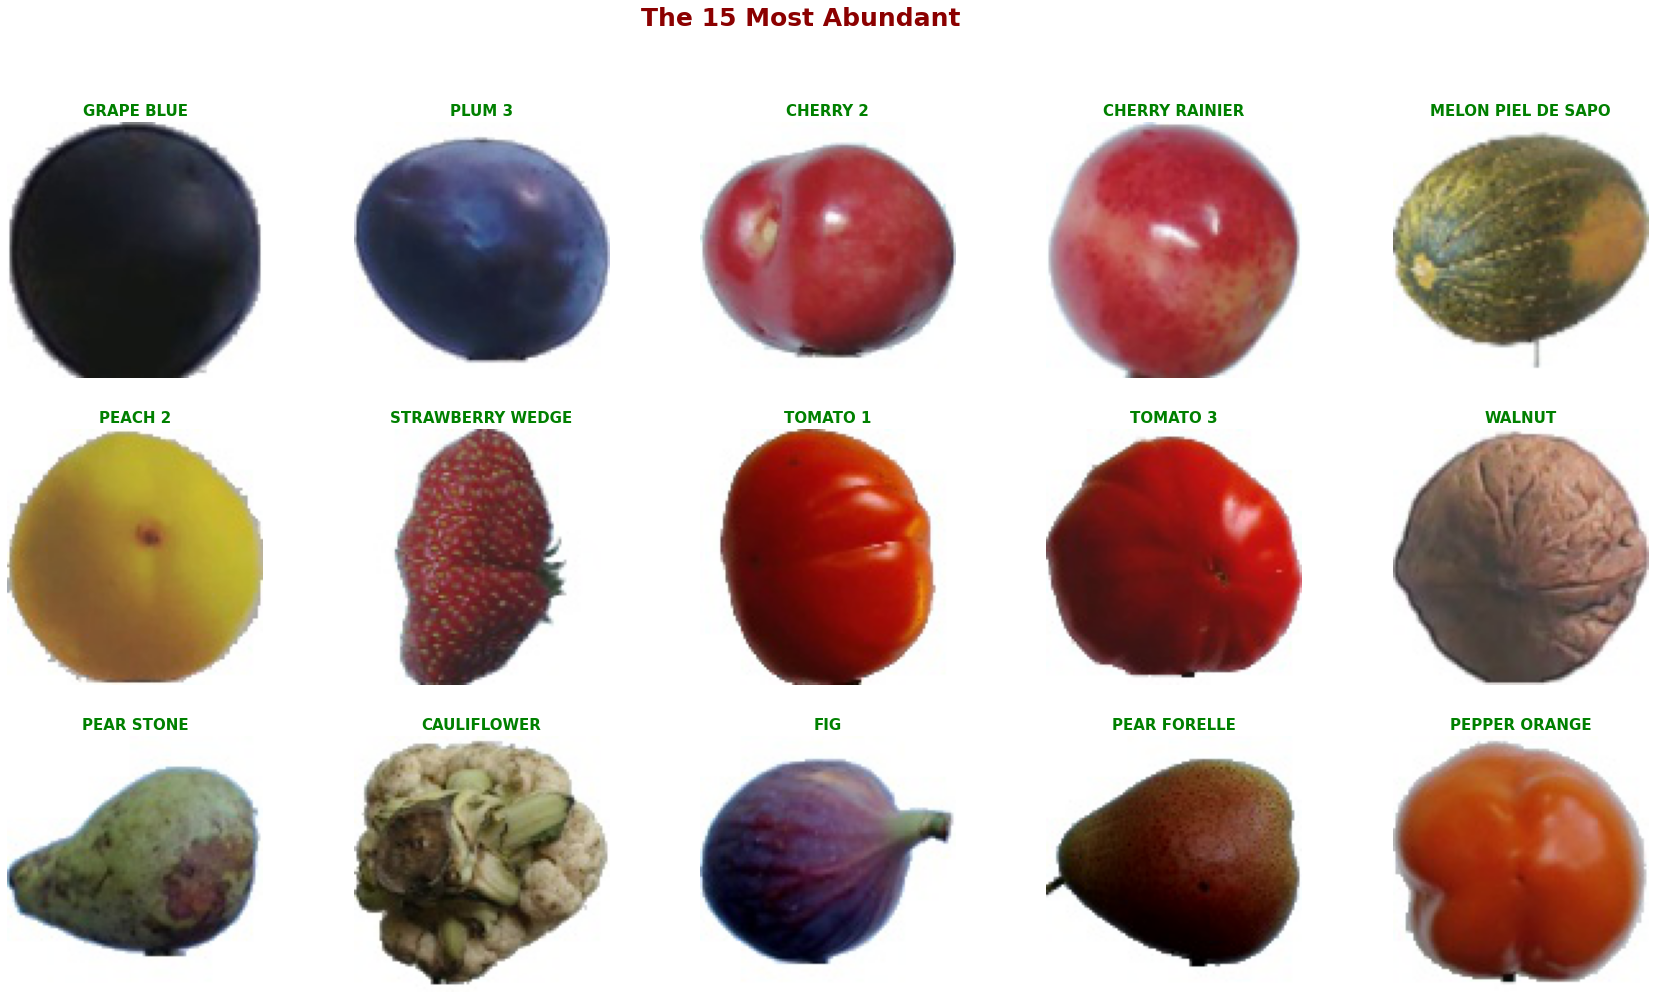

In [18]:
plt.figure(figsize=(30,16))
how_many_pics = len(x)

for i in range(how_many_pics):
    names = train_pics[train_pics["Labels"] == x[i]]["Images"].values [1]
    
    plt.subplot(3,5,i+1)
    img = load_img(train_data_directory + names)
    plt.imshow(img)
    plt.title(x[i].upper(), color = "green", fontsize = 15 , fontweight = 600)
    plt.axis("off")

plt.suptitle("The 15 Most Abundant", fontsize = 25 , color = "darkred", fontweight = 'bold')
plt.show()

In [19]:
datagen = ImageDataGenerator(rescale=1./255,shear_range=0.1,zoom_range=0.1,horizontal_flip=True, fill_mode='nearest')
train_generator = datagen.flow_from_directory(train_data_directory, 
                                                    target_size=(img_width, img_height), 
                                                    class_mode='categorical', 
                                                    shuffle = True,
                                                    batch_size=batch_size,)
val_generator = datagen.flow_from_directory(val_data_directory, 
                                                    target_size=(img_width, img_height), 
                                                    class_mode='categorical', 
                                                    batch_size=batch_size,shuffle = False)

Found 54111 images belonging to 131 classes.
Found 13581 images belonging to 131 classes.


In [21]:
print(train_generator.class_indices)

unique_labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('drive/MyDrive/labels/fruits_labels.txt','w') as f:
  f.write(unique_labels)

{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape White 4': 49, 'Grapefruit Pink': 50, 'Grapefrui

In [22]:
unique_labels = unique_labels.split('\n')

In [28]:
test_generator = datagen.flow_from_directory(test_data_directory, 
                                                    target_size=(img_width, img_height), 
                                                    class_mode='categorical',shuffle=False, 
                                                    batch_size=1)

Found 22688 images belonging to 131 classes.


In [29]:
INPUT_SHAPE = [None, img_height, img_width, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = train_generator.num_classes

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/classification/5"

In [30]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [31]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/classification/5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              2555993   
_________________________________________________________________
dense (Dense)                (None, 131)               131262    
Total params: 2,687,255
Trainable params: 131,262
Non-trainable params: 2,555,993
_________________________________________________________________


In [32]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [33]:
import datetime
# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/Data/vegetables_logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [34]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=2)

In [35]:
NUM_EPOCHS = 2 #@param {type:"slider", min:2, max:100, step:5}

In [36]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_generator,
            epochs=NUM_EPOCHS,
            validation_data=val_generator,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [37]:
#Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/classification/5
Epoch 1/2
1691/1691 [==============================] - 714s 403ms/step - loss: 0.1587 - accuracy: 0.9725 - val_loss: 0.0096 - val_accuracy: 0.9987
Epoch 2/2
1691/1691 [==============================] - 676s 400ms/step - loss: 0.0068 - accuracy: 0.9989 - val_loss: 0.0070 - val_accuracy: 0.9980


In [38]:
test_loss, test_acc = model.evaluate(test_generator)

22688/22688 [==============================] - 338s 15ms/step - loss: 0.0702 - accuracy: 0.9797


In [40]:
saved_model_dir = ''
tf.saved_model.save(model,saved_model_dir)

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('drive/MyDrive/tflite_models/fruits_model.tflite', 'wb') as f:
  f.write(tflite_model)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.


INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


In [41]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/tf_models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [42]:
# Save our model trained on whole images
save_model(model, suffix="fruits-identification-mobilenet_v3_small_100_224")

Saving model to: drive/MyDrive/tf_models/20210529-03031622257398-fruits-identification-mobilenet_v3_small_100_224.h5...


'drive/MyDrive/tf_models/20210529-03031622257398-fruits-identification-mobilenet_v3_small_100_224.h5'

In [43]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [44]:
model = load_model('/content/drive/MyDrive/tf_models/20210529-03031622257398-fruits-identification-mobilenet_v3_small_100_224.h5')

Loading saved model from: /content/drive/MyDrive/tf_models/20210529-03031622257398-fruits-identification-mobilenet_v3_small_100_224.h5


In [47]:
labels = ['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melon Piel de Sapo', 'Mulberry', 'Nectarine', 'Nectarine Flat', 'Nut Forest', 'Nut Pecan', 'Onion Red', 'Onion Red Peeled', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Peach 2', 'Peach Flat', 'Pear', 'Pear 2', 'Pear Abate', 'Pear Forelle', 'Pear Kaiser', 'Pear Monster', 'Pear Red', 'Pear Stone', 'Pear Williams', 'Pepino', 'Pepper Green', 'Pepper Orange', 'Pepper Red', 'Pepper Yellow', 'Physalis', 'Physalis with Husk', 'Pineapple', 'Pineapple Mini', 'Pitahaya Red', 'Plum', 'Plum 2', 'Plum 3', 'Pomegranate', 'Pomelo Sweetie', 'Potato Red', 'Potato Red Washed', 'Potato Sweet', 'Potato White', 'Quince', 'Rambutan', 'Raspberry', 'Redcurrant', 'Salak', 'Strawberry', 'Strawberry Wedge', 'Tamarillo', 'Tangelo', 'Tomato 1', 'Tomato 2', 'Tomato 3', 'Tomato 4', 'Tomato Cherry Red', 'Tomato Heart', 'Tomato Maroon', 'Tomato Yellow', 'Tomato not Ripened', 'Walnut', 'Watermelon']

Pineapple


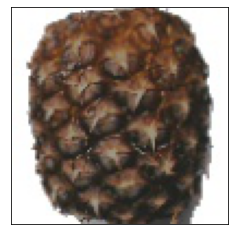

In [48]:
import os
from keras.preprocessing import image

def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # image path
    img_path = '/content/drive/MyDrive/fruits-360/Test/Pineapple/15_100.jpg'
    #img_path = '/media/data/dogscats/test1/19.jpg'      # cat
    # load a single image
    new_image = load_image(img_path)
    import matplotlib.image as mpimg
    plt.imshow(mpimg.imread(img_path))
    plt.xticks([])
    plt.yticks([])
    # check prediction
    pred = model.predict(new_image)
    print(labels[pred.argmax()])